In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.drop('RowNumber', axis=1, inplace=True)

# 9.1

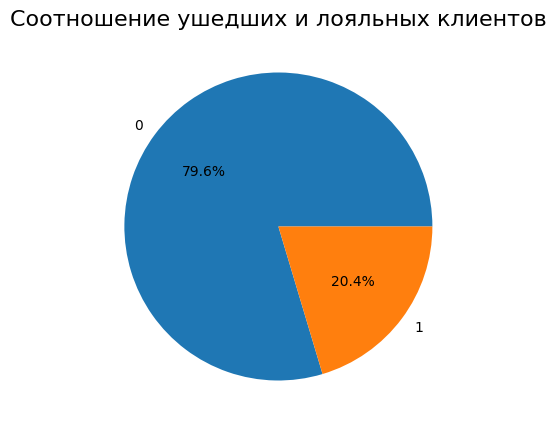

In [6]:
df_exited = df['Exited'].value_counts()
fig, axes = plt.subplots(figsize=(5, 5))

axes.pie(
    df_exited,
    labels=df_exited.index,
    autopct='%.1f%%'
);
axes.set_title('Соотношение ушедших и лояльных клиентов',fontsize=16);


График показывает результат сравнения количества ушедших и лояльных клиентов. Банком прекратило пользоваться 20 процентов людей,
то есть 2 тысячи из 10 тысяч.
Из этого можно сделать вывод, что ушла большая часть клиентов.


# 9.2

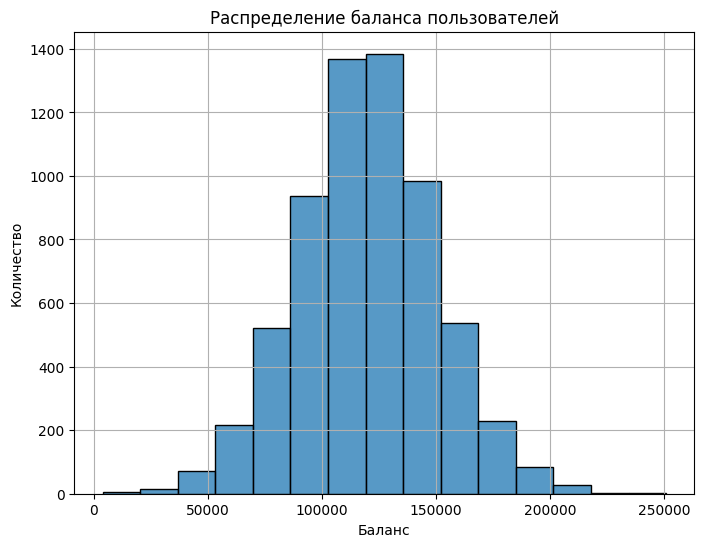

In [7]:
df_balance = df[df['Balance'] > 2500]
fig, axes = plt.subplots(figsize=(8,6))

sns.histplot(
    df_balance,
    x='Balance',
    bins=15,
    )
axes.set_title('Распределение баланса пользователей');
axes.set_xlabel('Баланс')
axes.set_ylabel('Количество')
axes.grid();

Видно что модальное значение лежит в интервале от 115 тысяч до 130 тысяч. От этого интервала с уменьшением и увеличением баланса идет резкий спад, который показывает, что малая часть клиентов банка хранит меньше 100 тысяч или больше 130 тысяч на своем балансе.

# 9.3

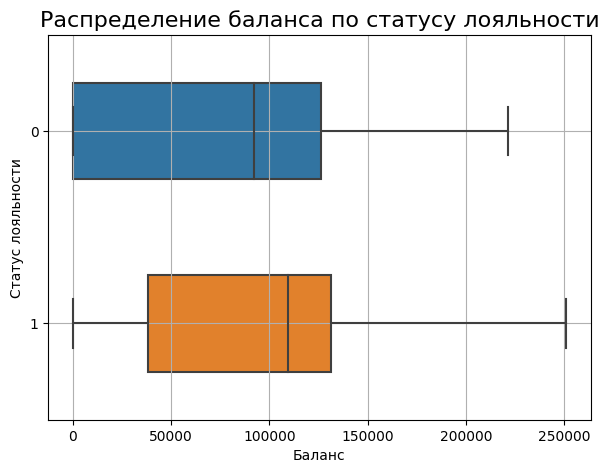

In [8]:
fig, axes = plt.subplots(figsize=(7, 5))

sns.boxplot(
    df,
    x='Balance',
    y='Exited',
    orient='h',
    width=0.5);
axes.set_title('Распределение баланса по статусу лояльности',fontsize=16);
axes.set_ylabel('Статус лояльности');
axes.set_xlabel('Баланс');
axes.grid();

Для обеих групп длина ящика разная. У клиентов банка левая граница равна нулю, можно предположить, что некоторая часть людей только недавно стали клиентами и еще не пополнили свой баланс. Медианный баланс у ушедших клиентов равен 110 тысячам, когда у лояльных клиентов он равен 90 тысячам. Также максимальное количество денег на балансе больше у ушедших клиентов - 250 тысяч, а у лояльных - 225 тысяч. 75 квантили почти равны между собой.

# 9.4

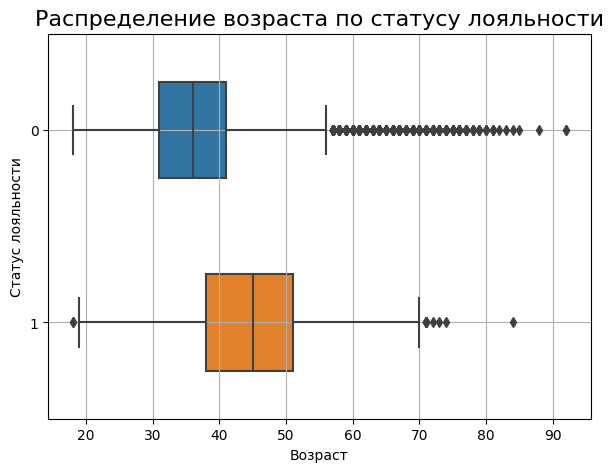

In [9]:
fig, axes = plt.subplots(figsize=(7, 5))

sns.boxplot(
    df,
    x='Age',
    y='Exited',
    orient='h',
    width=0.5);
axes.set_title('Распределение возраста по статусу лояльности', fontsize=16);
axes.set_xlabel('Возраст');
axes.set_ylabel('Статус лояльности');
axes.grid();

У группы лояльных клиентов намного больше потенциальных выбросов, нежели у группы ушедших клиентов. Медианное значение лояльных равняется 36 годам, когда у группы ушедших это значение будет равно 45 годам. Можно сделать вывод, что банку стоит обратить внимание на клиентов возрастом 38-51 лет.

# 9.5

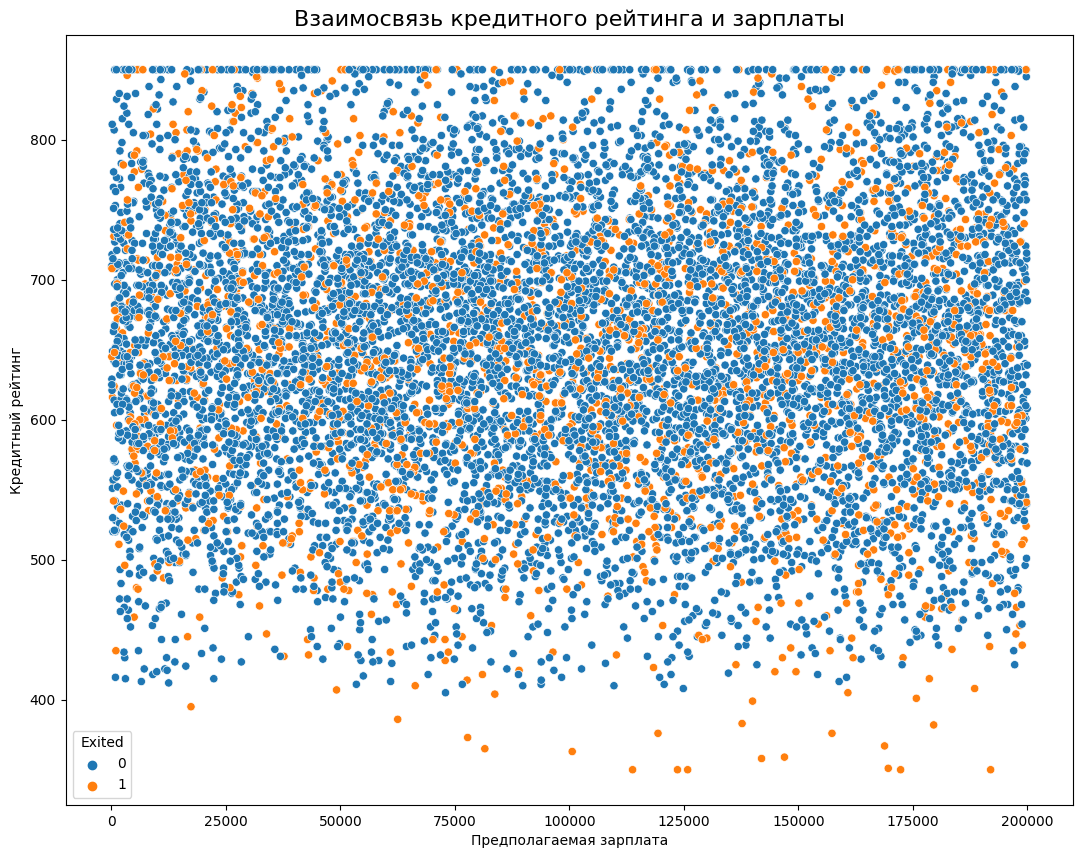

In [10]:
fig, axes = plt.subplots(figsize=(13, 10))

sns.scatterplot(
    df,
    x='EstimatedSalary',
    y='CreditScore',
    hue='Exited'
);
axes.set_title('Взаимосвязь кредитного рейтинга и зарплаты', fontsize=16);
axes.set_xlabel('Предполагаемая зарплата');
axes.set_ylabel('Кредитный рейтинг');

Взаимосвязь между предполагаемой зарплатой и кредитным рейтингом отсутствует. На графике видно, что модальное значение обеих в групп в диапазоне 600-700. Также можно заметить, что есть небольшое количество ушедших клиентов с кредитным рейтингом меньше 400. У лояльной группы такого не наблюдается.

# 9.6

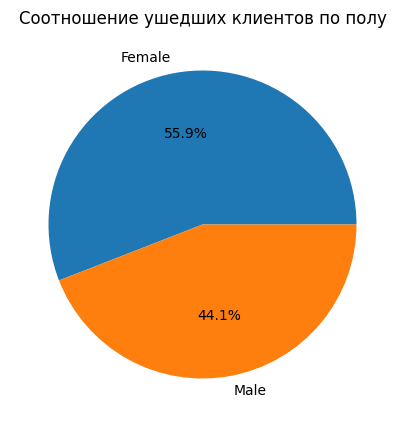

In [12]:
df_exited = df[df['Exited'] == 1]['Gender'].value_counts()
fig, axes = plt.subplots(figsize=(5, 5))

axes.pie(
    df_exited,
    labels=df_exited.index,
    autopct='%.1f%%'
);
axes.set_title('Соотношение ушедших клиентов по полу');



Женщины немного чаще прекращают пользоваться банком. И поэтому, разница в соотношении ушедших клиентов по полу небольшая.